<h1>Aprendizado baseado em multiplas instancias/classificadores</h1>
<h3>Essemble Learning</h3>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

In [18]:
base_inst = pd.read_csv("insurance.csv")
base_inst.head(5)

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [19]:
base_inst.shape

(20000, 28)

In [20]:
base_inst = base_inst.drop(columns = ["Unnamed: 0"])
base_inst = base_inst.dropna()
base_inst.head(5)

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many


In [21]:
y = base_inst.iloc[:,7].values
x = base_inst.iloc[:,[n for n in range(0,27) if n!= 7]].values

In [22]:
labelencoder = LabelEncoder()

In [23]:
for i in range(0,x.shape[1]):
  if(x[:,i].dtype == 'object'):
    x[:,i] = labelencoder.fit_transform(x[:,i])

In [24]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x,y,test_size = 0.3, random_state = 1
)


In [29]:
#model = RandomForestClassifier(random_state = 1, n_estimators = 500)
model = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth = 8, max_leaf_nodes = 8)
#modelo simplificado;
model.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

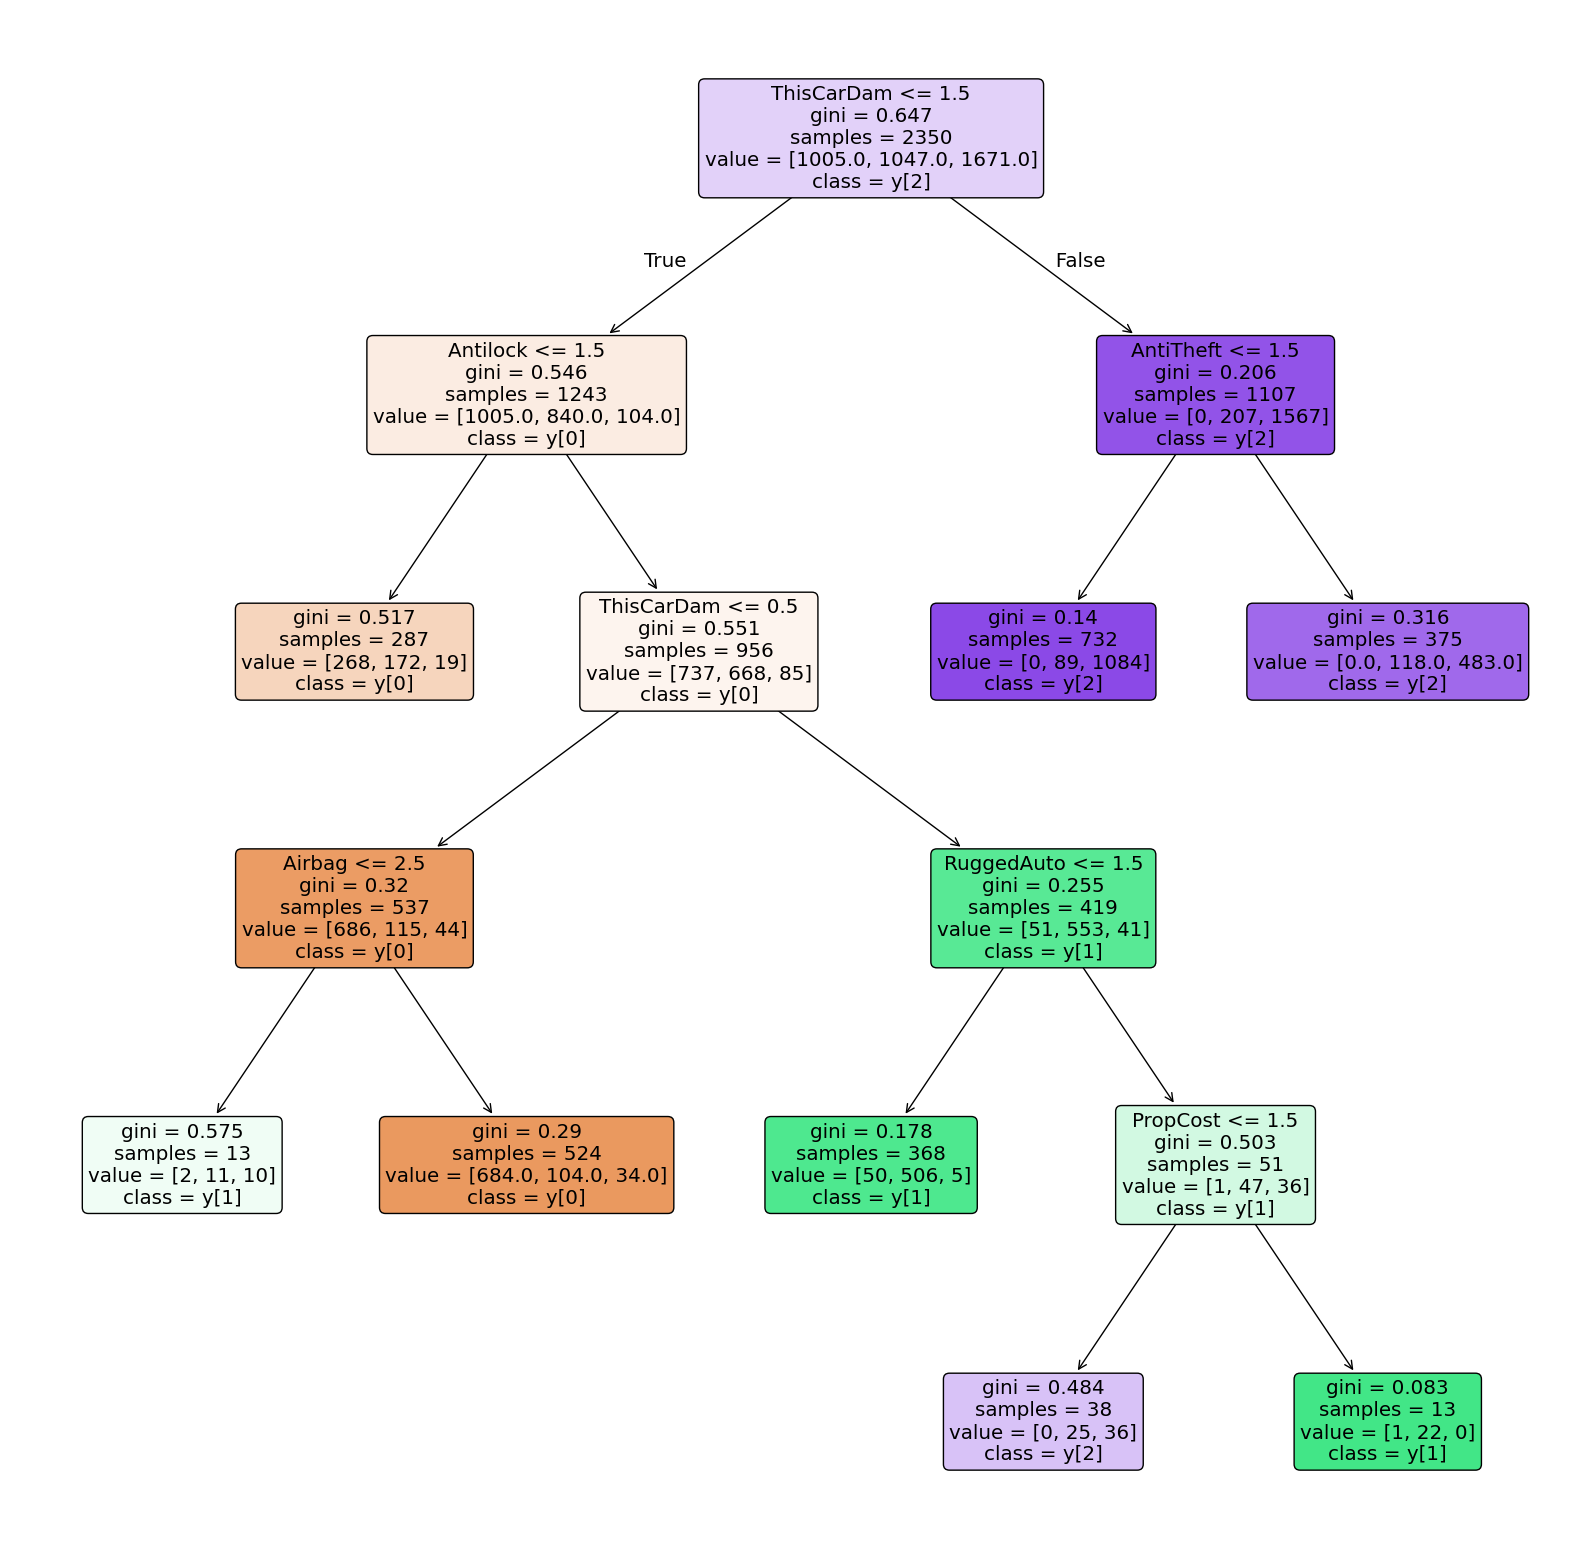

In [30]:
#impressao
tree_index = 0
tree_to_visualize = model.estimators_[tree_index]
plt.figure(figsize = (20,20))
plot_tree(tree_to_visualize, filled = True, feature_names =base_inst.columns[:-1], class_names = True, rounded = True)
plt.show()

In [31]:
previsoes = model.predict(x_teste)

In [32]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average = "weighted")
recall = recall_score(y_teste, previsoes, average = "weighted")
f1 = f1_score(y_teste, previsoes, average = "weighted") ##weigted == media ponderada
print(f"accuracy: {accuracy}; precision: {precision}; recall: {recall}; f1: {f1}")

accuracy: 0.8515037593984962; precision: 0.8490947489495771; recall: 0.8515037593984962; f1: 0.848849598293294
